# Gamma index

Importamos los paquetes *Dosepy*, así como *numpy* para crear matrices de ejemplo que representen dos distribuciones de dosis.

In [1]:
from Dosepy.image import load
import numpy as np

Generamos las matrices, A y B, con los valores 96 y 100 en todos sus elementos. 

In [2]:
A = np.zeros((30, 30)) + 96
B = np.zeros((30, 30)) + 100

Para generar las distribuciones de dosis, solamenta hace falta indicar la resolución espacial en puntos por pulgada (dpi). Asumiendo una resolución de 25.4 dpi (1 mm), y a las matrices A y B como distribución de referencia y distribución a evaluar, ejecutamos los siguientes comandos:

In [3]:
D_ref = load(A, dpi = 25.4)   # Se define la distribución de dosis de referencia
D_eval = load(B, dpi = 25.4)  # Se define la distribución de dosis a evaluar

La comparación gamma entre dos distribuciones de dosis se realiza mediante el método *gamma2D*. Como argumentos se requiere:
* La distribución de dosis de referencia
* El porcentaje de tolerancia para la diferencia en dosis.
* La distancia de tolerancia o criterio DTA en mm.

Sobre la variable D_eval, aplicamos el método gamma2D proporcionando como argumentos la distribución de referencia, D_ref, y el criterio (3 %, 1 mm). Asignamos el resultado a las variables siguientes:

In [4]:
gamma_distribution, pass_rate = D_eval.gamma2D( D_ref, 3, 1) 

print(f"El porcentaje de aporbación es: {pass_rate:.1f} %")

Dosis máxima: 100.0
Umbral de dosis: 10.0
El porcentaje de aporbación es: 0.0 %


De forma predeterminada en el algoritmo interno de Dosepy,  el porcentaje de aprobación (3 % en el ejemplo anterior) se considera relativo al máximo de la distribución de dosis a **evaluar**. Para cambiar esta opción y referenciar el porcentaje a la dosis local, llamamos al método gamma2D con un argumento extra, local_norm.

In [5]:
gamma_distribution, pass_rate = D_eval.gamma2D( D_ref, 3, 1, local_norm = True) 

print(f"El porcentaje de aporbación es: {pass_rate:.1f} %")

Dosis máxima: 100.0
Umbral de dosis: 10.0
El porcentaje de aporbación es: 0.0 %


Dado que **todos** los valores de las matrices A y B difieren en un 4 % entre sí, el resultado es 0 para el índice de aprobación en las dos comparaciones previas.

### Dose distributions from csv files

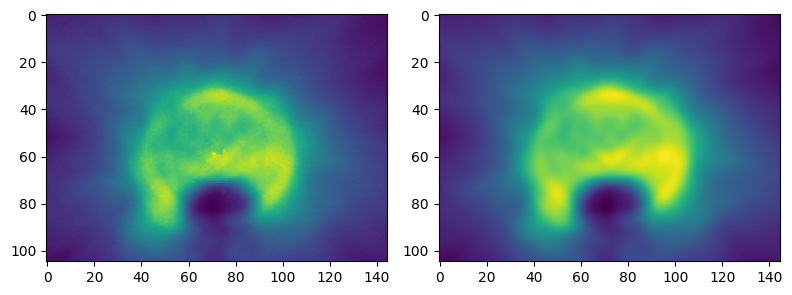

In [6]:

np_film = np.genfromtxt('/home/luis/Descargas/D_FILM.csv', delimiter = ",", comments = "#")
np_tps = np.genfromtxt('/home/luis/Descargas/D_TPS.csv', delimiter = ",", comments = "#")

d_film = load(np_film, dpi=25.4)
d_tps = load(np_tps, dpi=25.4)

#---------------------------------------------
#   Código para visualizar las distribuciones de dosis
import matplotlib.pyplot as plt
fig, axes = plt.subplots(1, 2, figsize=(8, 4))
ax = axes.ravel()
ax[0].imshow(d_film.array)
ax[1].imshow(d_tps.array)
fig.tight_layout()
plt.show()
#---------------------------------------------

Sobre la distribución d_tps, llamamos al método gamma2D, con criterio 3 %, 2 mm, descartando todos aquellos puntos con una dosis por debajo del 10 % (dose_tresh = 10). Para la comparación, se utilizará d_film como distribución de referencia y d_tps como distribución a evaluar. Se acota la región de busqueda a un radio de 10 mm. 

In [7]:
g, pass_rate = d_tps.gamma2D(d_film, 3, 2, dose_threshold = 10, mask_radius = 10)

#---------------------------------------------
#   Imprimimos el resultado
print(f'El índice de aprobación es: {pass_rate:.1f} %')
#---------------------------------------------


Dosis máxima: 8.5
Umbral de dosis: 0.9
El índice de aprobación es: 98.9 %


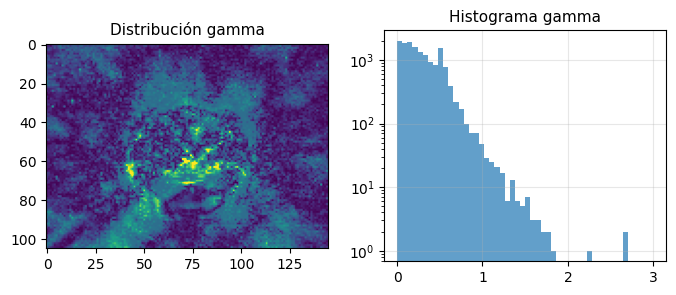

In [8]:
#---------------------------------------------
#   Graficamos el resultado

fig, axes = plt.subplots(1, 2, figsize=(8, 3))
ax = axes.ravel()

ax[0].set_title('Distribución gamma', fontsize = 11)
ax[0].imshow(g, vmax = 1.4)

ax[1].set_title('Histograma gamma', fontsize = 11)
ax[1].grid(alpha = 0.3)
ax[1].hist( g[~np.isnan(g)] , bins = 50, range = (0,3), alpha = 0.7, log= True)

plt.show()

```{note}
In order to generate easy-to-use software for users who use radiochromic film, dose distributions must meet the following characteristics:
* Film dose distributions must have the same physical dimensions and spatial resolution (equal number of rows and columns) with respect to the dose distribution to be compared. You can use {py:func}`Dosepy.tools.resol.match_resolution` function to manage array size changes.
* The distributions must be registered, that is, the coordinate of a point in the reference distribution must be equal to the coordinate of the same point in the distribution to be evaluated. To achieve this, [ImageJ](https://imagej.nih.gov/ij/download.html) is an excellent tool to crop the region to be analyzed.
* Gray (Gy) and millimeters (mm) are the units used for absorbed dose and physical distance, respectively.
* The dicom file must contain only a 2D dose distribution.

```